In [4]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from urllib.request import urlopen
import json

# URL to the JSON file
url = "https://static.bc-edx.com/data/dl-1-2/m14/lms/starter/samples.json"

# Read the JSON data from the URL into a Pandas DataFrame
data = pd.read_json(url)

# Display the DataFrame (or you can inspect it with other methods)
print(data.head())  # Display the first few rows


   names                                           metadata  \
0    940  {'id': 940, 'ethnicity': 'Caucasian', 'gender'...   
1    941  {'id': 941, 'ethnicity': 'Caucasian/Midleaster...   
2    943  {'id': 943, 'ethnicity': 'Caucasian', 'gender'...   
3    944  {'id': 944, 'ethnicity': 'European', 'gender':...   
4    945  {'id': 945, 'ethnicity': 'Caucasian', 'gender'...   

                                             samples  
0  {'id': '940', 'otu_ids': [1167, 2859, 482, 226...  
1  {'id': '941', 'otu_ids': [2722, 944, 2419, 253...  
2  {'id': '943', 'otu_ids': [1795], 'sample_value...  
3  {'id': '944', 'otu_ids': [922, 3555, 943, 1013...  
4  {'id': '945', 'otu_ids': [944, 1795, 922, 2419...  


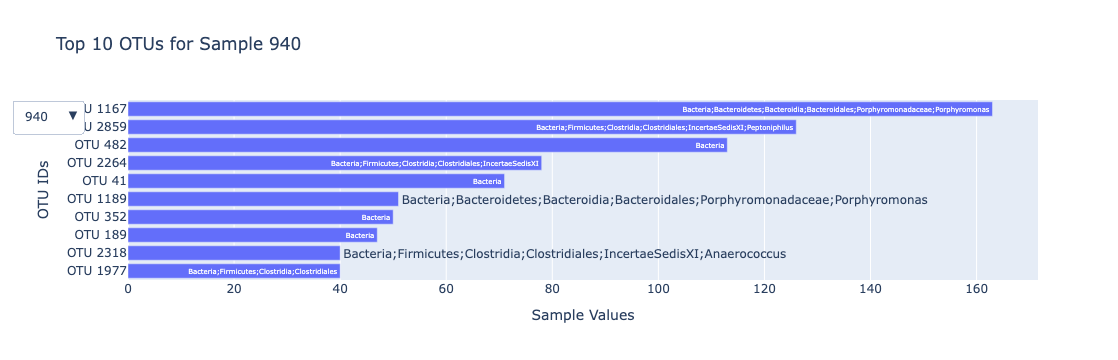

In [5]:
# URL to the JSON file
url = "https://static.bc-edx.com/data/dl-1-2/m14/lms/starter/samples.json"

# Load the JSON data
with urlopen(url) as response:
    data = json.load(response)

# Convert to a DataFrame
samples_df = pd.DataFrame(data['samples'])

# Function to create the bar chart
def create_bar_chart(sample_id):
    # Get the data for the selected sample
    sample_data = samples_df[samples_df['id'] == sample_id].iloc[0]

    # Extract the top 10 OTUs
    top_10_values = sample_data['sample_values'][:10]
    top_10_ids = sample_data['otu_ids'][:10]
    top_10_labels = sample_data['otu_labels'][:10]

    # Create the bar chart
    fig = go.Figure(go.Bar(
        x=top_10_values[::-1],
        y=[f"OTU {otu_id}" for otu_id in top_10_ids[::-1]],
        text=top_10_labels[::-1],
        orientation='h'
    ))

    # Update layout
    fig.update_layout(
        title=f"Top 10 OTUs for Sample {sample_id}",
        xaxis_title="Sample Values",
        yaxis_title="OTU IDs"
    )

    return fig

# Initial plot
sample_ids = samples_df['id'].tolist()
fig = create_bar_chart(sample_ids[0])

# Add dropdown menu
fig.update_layout(
    updatemenus=[{
        'buttons': [
            {'label': sample_id, 
             'method': 'update', 
             'args': [{'visible': [True]}, {'title': f'Top 10 OTUs for Sample {sample_id}'}]} 
            for sample_id in sample_ids
        ],
        'direction': 'down',
        'showactive': True
    }]
)

# Show the plot
fig.show()


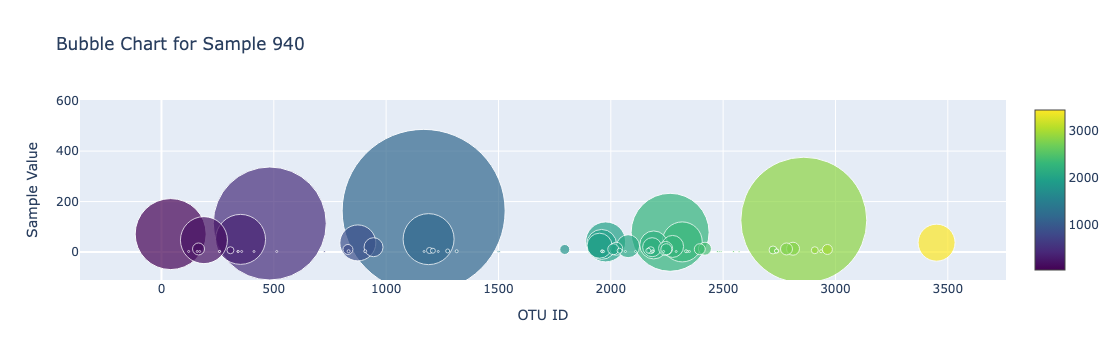

In [6]:
# Load the JSON data
with urlopen(url) as response:
    data = json.load(response)

# Convert to a DataFrame
samples_df = pd.DataFrame(data['samples'])

# Function to create the bubble chart
def create_bubble_chart(sample_id):
    # Get the data for the selected sample
    sample_data = samples_df[samples_df['id'] == sample_id].iloc[0]

    # Create the bubble chart
    fig = go.Figure(data=[go.Scatter(
        x=sample_data['otu_ids'],
        y=sample_data['sample_values'],
        text=sample_data['otu_labels'],
        mode='markers',
        marker=dict(
            size=sample_data['sample_values'],
            color=sample_data['otu_ids'],
            colorscale='Viridis',
            showscale=True
        )
    )])

    # Update layout
    fig.update_layout(
        title=f"Bubble Chart for Sample {sample_id}",
        xaxis_title="OTU ID",
        yaxis_title="Sample Value",
        hovermode="closest"
    )

    return fig

# Example usage: create bubble chart for the first sample
sample_id = samples_df['id'].iloc[0]
fig = create_bubble_chart(sample_id)

# Show the plot
fig.show()


In [13]:
from IPython.display import display, HTML

# HTML content as a string
html_content = """
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Interactive Dashboard</title>
    <script src="https://d3js.org/d3.v7.min.js"></script>
    <script src="https://cdn.plot.ly/plotly-latest.min.js"></script>
    <style>
        body {
            font-family: Arial, sans-serif;
            margin: 20px;
        }
        .dashboard {
            display: flex;
            flex-wrap: wrap;
        }
        .plot-container, .metadata-container {
            margin: 20px;
        }
        #sample-metadata {
            border: 1px solid #ccc;
            padding: 10px;
            width: 300px;
        }
    </style>
</head>
<body>
    <h1>Interactive Dashboard</h1>
    <div>
        <label for="selDataset">Select a Sample:</label>
        <select id="selDataset"></select>
    </div>

    <div class="dashboard">
        <div class="plot-container">
            <div id="bar"></div>
        </div>
        <div class="plot-container">
            <div id="bubble"></div>
        </div>
        <div class="metadata-container">
            <div id="sample-metadata"></div>
        </div>
    </div>

    <script>
        // Load the JSON data
        d3.json("samples.json").then(function(data) {
            const metadata = data.metadata;
            const samples = data.samples;
            const dropdownMenu = d3.select("#selDataset");

            // Populate the dropdown menu with sample IDs
            samples.forEach(sample => {
                dropdownMenu.append("option")
                    .text(sample.id)
                    .property("value", sample.id);
            });

            // Function to build the bar chart
            function buildBarChart(sample) {
                const otu_ids = sample.otu_ids.slice(0, 10).reverse();
                const sample_values = sample.sample_values.slice(0, 10).reverse();
                const otu_labels = sample.otu_labels.slice(0, 10).reverse();

                const trace = {
                    x: sample_values,
                    y: otu_ids.map(id => `OTU ${id}`),
                    text: otu_labels,
                    type: "bar",
                    orientation: "h"
                };

                const data = [trace];

                const layout = {
                    title: "Top 10 OTUs",
                    margin: { t: 30, l: 150 }
                };

                Plotly.newPlot("bar", data, layout);
            }

            // Function to build the bubble chart
            function buildBubbleChart(sample) {
                const trace = {
                    x: sample.otu_ids,
                    y: sample.sample_values,
                    text: sample.otu_labels,
                    mode: "markers",
                    marker: {
                        size: sample.sample_values,
                        color: sample.otu_ids,
                        colorscale: "Earth"
                    }
                };

                const data = [trace];

                const layout = {
                    title: "OTU ID vs. Sample Values",
                    xaxis: { title: "OTU ID" },
                    yaxis: { title: "Sample Values" },
                    margin: { t: 30 }
                };

                Plotly.newPlot("bubble", data, layout);
            }

            // Function to display the metadata
            function displayMetadata(metadata) {
                const panel = d3.select("#sample-metadata");
                panel.html("");
                Object.entries(metadata).forEach(([key, value]) => {
                    panel.append("p").text(`${key}: ${value}`);
                });
            }

            // Function to update all charts and metadata
            function updateDashboard(sampleID) {
                const sample = samples.find(s => s.id === sampleID);
                const meta = metadata.find(m => m.id === +sampleID);

                buildBarChart(sample);
                buildBubbleChart(sample);
                displayMetadata(meta);
            }

            // Display initial data
            const initialSample = samples[0].id;
            updateDashboard(initialSample);

            // Update the dashboard when a new sample is selected
            dropdownMenu.on("change", function() {
                const selectedSample = d3.select(this).property("value");
                updateDashboard(selectedSample);
            });
        });
    </script>
</body>
</html>
"""

# Display the HTML content in the notebook
display(HTML(html_content))
